In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import pandas as pd
from config import lunarcrush_api
import numpy as np

In [2]:
#URL Configuration
url = 'https://api.lunarcrush.com/v2?data=assets'

query_url = f'{url}&key={lunarcrush_api}&symbol='

In [3]:
#Create list of currency

coins = ['BTC', 'ETH', 'LTC', 'BCH', 'BNB', 'USDT', 'XRP'] 
percent_change_24h = []
percent_change_7d = []
percent_change_30d = []
social_score = []
correlation_rank = []
volatility = []
symbol = []
galaxy_score = []

for coin in coins:
    response = requests.get(query_url + coin).json()
    symbol.append(response['data'][0]['symbol'])
    percent_change_24h.append(response['data'][0]['percent_change_24h'])
    percent_change_7d.append(response['data'][0]['percent_change_7d'])
    percent_change_30d.append(response['data'][0]['percent_change_30d'])
    social_score.append(response['data'][0]['social_score'])
    correlation_rank.append(response['data'][0]['correlation_rank'])
    volatility.append(response['data'][0]['volatility'])
    galaxy_score.append(response['data'][0]['galaxy_score'])



In [4]:
#create dictionary to turn into DF

lc_dict = {
    'Symbol':symbol, 
    '%Change 24hour': percent_change_24h, 
    '%Change 7day': percent_change_7d, 
    '%Change 30day': percent_change_30d,  
    'Volatility': volatility} 

social_dict = {'Symbol':symbol,
               '%Change 30day': percent_change_30d,
               'Social Score': social_score,
               'Correlation Rank': correlation_rank,
               'Galaxy Score':galaxy_score
              }

In [5]:
lc_df = pd.DataFrame(lc_dict)
lc_df.set_index('Symbol')

,%Change 24hour,%Change 7day,%Change 30day,Volatility
Symbol,,,,
BTC,4.81,4.04,26.98,0.019497
ETH,2.93,2.62,13.70,0.016527
LTC,2.26,9.36,28.36,0.012565
BCH,2.48,1.48,16.47,0.015190
BNB,0.90,5.34,16.47,0.015499
USDT,0.26,-2.76,-0.95,0.000672
XRP,1.63,-0.34,4.07,0.010128


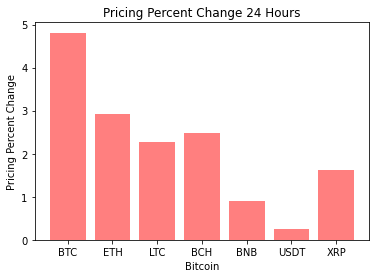

In [13]:
x_axis = lc_df['Symbol']

plt.bar(lc_df['Symbol'], lc_df['%Change 24hour'], color='r', alpha=0.5, align="center")
plt.title('Pricing Percent Change 24 Hours')
plt.xlabel('Bitcoin')
plt.ylabel('Pricing Percent Change')
plt.show()

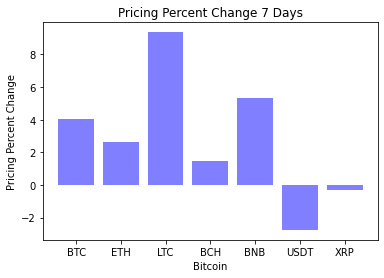

In [14]:
x_axis = lc_df['Symbol']

plt.bar(lc_df['Symbol'], lc_df['%Change 7day'], color='b', alpha=0.5, align="center")
plt.title('Pricing Percent Change 7 Days')
plt.xlabel('Bitcoin')
plt.ylabel('Pricing Percent Change')
plt.show()

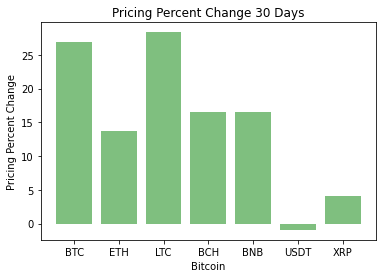

In [16]:
x_axis = lc_df['Symbol']

plt.bar(lc_df['Symbol'], lc_df['%Change 30day'], color='g', alpha=0.5, align="center")
plt.title('Pricing Percent Change 30 Days')
plt.xlabel('Bitcoin')
plt.ylabel('Pricing Percent Change')
plt.show()

In [9]:
social_df = pd.DataFrame(social_dict)
social_df

,Symbol,%Change 30day,Social Score,Correlation Rank,Galaxy Score
0,BTC,26.98,20328735,4.9,78.0
1,ETH,13.70,1487314,4.2,71.0
2,LTC,28.36,120655,3.1,68.0
3,BCH,16.47,4313,3.2,68.5
4,BNB,16.47,56790,3.2,65.0
5,USDT,-0.95,9343,2.9,73.0
6,XRP,4.07,166998,3.1,67.5


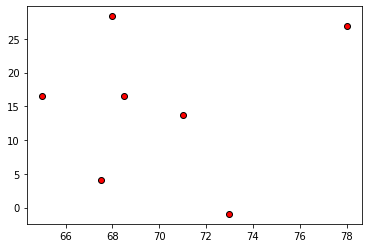

In [12]:
plt.scatter(social_df['Galaxy Score'], social_df['%Change 30day'],facecolors="red", edgecolors="black" )

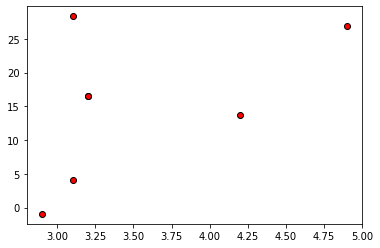

In [11]:
plt.scatter(social_df['Correlation Rank'], social_df['%Change 30day'],facecolors="red", edgecolors="black" )